In [38]:
import pandas as pd

# Definir os tipos de dados esperados para as colunas
dtype_dict = {
    'DatGeracaoConjuntoDados': 'str',
    'IdeConjuntoUnidadeConsumidora': 'float64',
    'DscConjuntoUnidadeConsumidora': 'str',
    'DscAlimentadorSubestacao': 'str',
    'DscSubestacaoDistribuicao': 'str',
    'NumOrdemInterrupcao': 'str',
    'DscTipoInterrupcao': 'str',
    'IdeMotivoInterrupcao': 'float64',
    'DatInicioInterrupcao': 'str',
    'DatFimInterrupcao': 'str',
    'DscFatoGeradorInterrupcao': 'str',
    'NumNivelTensao': 'float64',
    'NumUnidadeConsumidora': 'float64',
    'NumConsumidorConjunto': 'float64',
    'NumAno': 'float64',
    'NomAgenteRegulado': 'str',
    'SigAgente': 'str',
    'NumCPFCNPJ': 'str'
}

# Carregar os dados com o delimitador correto e os tipos de dados especificados
file_path = 'C:/Users/DESKTOP/Documents/hihi/Base de dados/interrupcoes-energia-eletrica-2024.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';', dtype=dtype_dict, low_memory=False)

# Remover linhas onde todas as colunas são NaN
df.dropna(how='all', inplace=True)

# Remover linhas onde as colunas essenciais são NaN (ajuste conforme necessário)
df.dropna(subset=['DatGeracaoConjuntoDados', 'IdeConjuntoUnidadeConsumidora', 'DatInicioInterrupcao', 'DatFimInterrupcao'], inplace=True)

# Converter colunas de data para o tipo datetime
df['DatInicioInterrupcao'] = pd.to_datetime(df['DatInicioInterrupcao'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['DatFimInterrupcao'] = pd.to_datetime(df['DatFimInterrupcao'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['DatGeracaoConjuntoDados'] = pd.to_datetime(df['DatGeracaoConjuntoDados'], format='%Y-%m-%d', errors='coerce')

# Exibir as primeiras linhas e informações do DataFrame para verificar o resultado
print(df.head())
print(df.info())

   DatGeracaoConjuntoDados  IdeConjuntoUnidadeConsumidora  \
25              2024-07-10                        12595.0   
26              2024-07-10                        12595.0   
27              2024-07-10                        12598.0   
28              2024-07-10                        17306.0   
29              2024-07-10                        17310.0   

   DscConjuntoUnidadeConsumidora DscAlimentadorSubestacao  \
25               Cruzeiro do Sul                     01C1   
26               Cruzeiro do Sul                     01C1   
27          Marechal Thaumaturgo                     01C1   
28                       TAQUARI                     01C8   
29                   ALTO ALEGRE                     01C1   

   DscSubestacaoDistribuicao NumOrdemInterrupcao DscTipoInterrupcao  \
25                       CSU             2024-21     Não Programada   
26                       CSU          2024-24508     Não Programada   
27                       MTH          2024-54239     

In [39]:
import pandas as pd

# Carregar a base de dados 'indqual-municipio.csv'
file_path_indqual = 'C:/Users/DESKTOP/Documents/hihi/Base de dados/indqual-municipio.csv'
df_indqual = pd.read_csv(file_path_indqual, encoding='ISO-8859-1', delimiter=';')

# Converter a coluna de data para o formato datetime
df_indqual['DatGeracaoConjuntoDados'] = pd.to_datetime(df_indqual['DatGeracaoConjuntoDados'], format='%Y-%m-%d')

# Tratar valores ausentes: Remover linhas onde NomMunicipio ou SigUF estão ausentes
df_indqual.dropna(subset=['NomMunicipio', 'SigUF'], inplace=True)

# Exibir as primeiras linhas após o tratamento
print(df_indqual.head())
print(df_indqual.info())

  DatGeracaoConjuntoDados  IdeConjUnidConsumidoras  CodMunicipio  \
0              2024-08-05                        1       2929305   
1              2024-08-05                        2       4315503   
2              2024-08-05                        3       2201002   
3              2024-08-05                        3       2202075   
4              2024-08-05                        3       2204105   

             NomMunicipio SigUF  
0  São Gonçalo dos Campos    BA  
1           Restinga Seca    RS  
2                 Arraial    PI  
3     Cajazeiras do Piauí    PI  
4         Francisco Ayres    PI  
<class 'pandas.core.frame.DataFrame'>
Index: 41952 entries, 0 to 41989
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DatGeracaoConjuntoDados  41952 non-null  datetime64[ns]
 1   IdeConjUnidConsumidoras  41952 non-null  int64         
 2   CodMunicipio             41952 non-

In [40]:
# Realizar o merge entre as duas bases utilizando a coluna 'IdeConjUnidConsumidoras' como chave
merged_df = pd.merge(df_indqual, df, how='inner', left_on='IdeConjUnidConsumidoras', right_on='IdeConjuntoUnidadeConsumidora')

# Exibir as primeiras linhas do DataFrame resultante
merged_df.head(), merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24861477 entries, 0 to 24861476
Data columns (total 23 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   DatGeracaoConjuntoDados_x      datetime64[ns]
 1   IdeConjUnidConsumidoras        int64         
 2   CodMunicipio                   int64         
 3   NomMunicipio                   object        
 4   SigUF                          object        
 5   DatGeracaoConjuntoDados_y      datetime64[ns]
 6   IdeConjuntoUnidadeConsumidora  float64       
 7   DscConjuntoUnidadeConsumidora  object        
 8   DscAlimentadorSubestacao       object        
 9   DscSubestacaoDistribuicao      object        
 10  NumOrdemInterrupcao            object        
 11  DscTipoInterrupcao             object        
 12  IdeMotivoInterrupcao           float64       
 13  DatInicioInterrupcao           datetime64[ns]
 14  DatFimInterrupcao              datetime64[ns]
 15  DscFatoGerado

(  DatGeracaoConjuntoDados_x  IdeConjUnidConsumidoras  CodMunicipio  \
 0                2024-08-05                      964       3537107   
 1                2024-08-05                      964       3537107   
 2                2024-08-05                      964       3537107   
 3                2024-08-05                      964       3537107   
 4                2024-08-05                      964       3537107   
 
   NomMunicipio SigUF DatGeracaoConjuntoDados_y  IdeConjuntoUnidadeConsumidora  \
 0     Pedreira    SP                2024-07-10                          964.0   
 1     Pedreira    SP                2024-07-10                          964.0   
 2     Pedreira    SP                2024-07-10                          964.0   
 3     Pedreira    SP                2024-07-10                          964.0   
 4     Pedreira    SP                2024-07-10                          964.0   
 
     DscConjuntoUnidadeConsumidora DscAlimentadorSubestacao  \
 0  PEDREIRA   

In [41]:
# 1. Detecção de Duplicatas Exatas
exact_duplicates = merged_df[merged_df.duplicated()]
num_exact_duplicates = exact_duplicates.shape[0]
print(f"Número de duplicatas exatas: {num_exact_duplicates}")

# 2. Detecção de Duplicatas com Base em um Subconjunto de Colunas
subset_columns = ['IdeConjUnidConsumidoras', 'CodMunicipio', 'DatInicioInterrupcao', 'DatFimInterrupcao']
subset_duplicates = merged_df[merged_df.duplicated(subset=subset_columns)]
num_subset_duplicates = subset_duplicates.shape[0]
print(f"Número de duplicatas no subconjunto de colunas {subset_columns}: {num_subset_duplicates}")

# 3. Contagem de Ocorrências Repetidas
# Agrupando pelo subconjunto de colunas para verificar repetições
count_repetitions = merged_df.groupby(subset_columns).size().reset_index(name='counts')
repeated_entries = count_repetitions[count_repetitions['counts'] > 1]
num_repeated_entries = repeated_entries.shape[0]
print(f"Número de combinações de chaves que se repetem: {num_repeated_entries}")

# Exibir exemplos de duplicatas encontradas
print("Exemplos de duplicatas exatas:")
print(exact_duplicates.head())

print("Exemplos de duplicatas no subconjunto de colunas:")
print(subset_duplicates.head())

print("Exemplos de combinações de chaves que se repetem:")
print(repeated_entries.head())

Número de duplicatas exatas: 27122
Número de duplicatas no subconjunto de colunas ['IdeConjUnidConsumidoras', 'CodMunicipio', 'DatInicioInterrupcao', 'DatFimInterrupcao']: 1700687
Número de combinações de chaves que se repetem: 867780
Exemplos de duplicatas exatas:
      DatGeracaoConjuntoDados_x  IdeConjUnidConsumidoras  CodMunicipio  \
82235                2024-08-05                    12542       4301909   
86443                2024-08-05                    12542       4306767   
90651                2024-08-05                    12542       4309308   
94859                2024-08-05                    12542       4311981   
99067                2024-08-05                    12542       4314902   

           NomMunicipio SigUF DatGeracaoConjuntoDados_y  \
82235  Barra do Ribeiro    RS                2024-07-10   
86443   Eldorado do Sul    RS                2024-07-10   
90651            Guaíba    RS                2024-07-10   
94859  Mariana Pimentel    RS                2024-07-

In [42]:
# 1. Remover Duplicatas Exatas
merged_df = merged_df.drop_duplicates()
print(f"Registros após remover duplicatas exatas: {merged_df.shape}")

# 2. Tratar Duplicatas Baseadas em Subconjunto de Colunas
# Mantendo apenas a primeira ocorrência
merged_df_no_subset_duplicates = merged_df.drop_duplicates(subset=subset_columns, keep='first')
print(f"Registros após remover duplicatas do subconjunto: {merged_df_no_subset_duplicates.shape}")

Registros após remover duplicatas exatas: (24834355, 23)
Registros após remover duplicatas do subconjunto: (23160790, 23)


In [43]:
# Mapeamento das siglas de estado para as regiões do Brasil
estado_para_regiao = {
    'AC': 'N', 'AL': 'NE', 'AM': 'N', 'AP': 'N', 'BA': 'NE', 'CE': 'NE', 'DF': 'CO', 'ES': 'SE',
    'GO': 'CO', 'MA': 'NE', 'MG': 'SE', 'MS': 'CO', 'MT': 'CO', 'PA': 'N', 'PB': 'NE', 'PE': 'NE',
    'PI': 'NE', 'PR': 'S', 'RJ': 'SE', 'RN': 'NE', 'RO': 'N', 'RR': 'N', 'RS': 'S', 'SC': 'S',
    'SE': 'NE', 'SP': 'SE', 'TO': 'N'
}

# Criar a nova coluna 'Regiao' com base na coluna 'SigUF'
merged_df['Regiao'] = merged_df['SigUF'].map(estado_para_regiao)

# Exibir as primeiras linhas para verificar a nova coluna
merged_df[['SigUF', 'Regiao']].head()

,SigUF,Regiao
0,SP,SE
1,SP,SE
2,SP,SE
3,SP,SE
4,SP,SE


In [44]:
# Exibir todas as colunas do DataFrame após o merge e remoção de duplicatas
print("Colunas do DataFrame pós merge e remoção de duplicatas:")
print(merged_df.columns)

Colunas do DataFrame pós merge e remoção de duplicatas:
Index(['DatGeracaoConjuntoDados_x', 'IdeConjUnidConsumidoras', 'CodMunicipio',
       'NomMunicipio', 'SigUF', 'DatGeracaoConjuntoDados_y',
       'IdeConjuntoUnidadeConsumidora', 'DscConjuntoUnidadeConsumidora',
       'DscAlimentadorSubestacao', 'DscSubestacaoDistribuicao',
       'NumOrdemInterrupcao', 'DscTipoInterrupcao', 'IdeMotivoInterrupcao',
       'DatInicioInterrupcao', 'DatFimInterrupcao',
       'DscFatoGeradorInterrupcao', 'NumNivelTensao', 'NumUnidadeConsumidora',
       'NumConsumidorConjunto', 'NumAno', 'NomAgenteRegulado', 'SigAgente',
       'NumCPFCNPJ', 'Regiao'],
      dtype='object')


### 1. Nome da coluna: **DatGeracaoConjuntoDados_x**
- **Nome real:** Data de Geração do Conjunto de Dados (Municípios)
- **Tipo de dado:** `datetime64[ns]`
- **Exemplo de cadeia:** `2024-08-05`
- **Descrição:** Representa a data em que o conjunto de dados de municípios foi gerado. Indica quando os dados de município foram processados e incluídos na base.
---
### 2. Nome da coluna: **IdeConjUnidConsumidoras**
- **Nome real:** Identificador do Conjunto de Unidades Consumidoras
- **Tipo de dado:** `int64`
- **Exemplo de cadeia:** `12542`
- **Descrição:** É o código único que identifica o conjunto de unidades consumidoras. Este identificador é utilizado para relacionar os dados de interrupções com os municípios correspondentes.
---
### 3. Nome da coluna: **CodMunicipio**
- **Nome real:** Código do Município (IBGE)
- **Tipo de dado:** `int64`
- **Exemplo de cadeia:** `4301909`
- **Descrição:** É o código numérico oficial do município, conforme definido pelo IBGE. Este código é usado para identificar unicamente cada município no Brasil.
---
### 4. Nome da coluna: **NomMunicipio**
- **Nome real:** Nome do Município
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `São Paulo`
- **Descrição:** Contém o nome completo do município associado à interrupção de energia ou outro evento registrado. É utilizado para referência geográfica e análise.
---
### 5. Nome da coluna: **SigUF**
- **Nome real:** Sigla da Unidade Federativa
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `SP`
- **Descrição:** Representa a sigla do estado (Unidade Federativa) onde o município está localizado. É usado para categorizar e analisar os dados por estado.
---
### 6. Nome da coluna: **DatGeracaoConjuntoDados_y**
- **Nome real:** Data de Geração do Conjunto de Dados (Interrupções)
- **Tipo de dado:** `datetime64[ns]`
- **Exemplo de cadeia:** `2024-07-10`
- **Descrição:** Refere-se à data em que os dados de interrupções de energia foram gerados e processados. Isso indica a atualidade das informações de interrupções no conjunto de dados.
---
### 7. Nome da coluna: **IdeConjuntoUnidadeConsumidora**
- **Nome real:** Identificador da Unidade Consumidora
- **Tipo de dado:** `float64`
- **Exemplo de cadeia:** `12542.0`
- **Descrição:** É o identificador único da unidade consumidora específica. Este identificador relaciona as interrupções de energia a uma unidade consumidora específica.
---
### 8. Nome da coluna: **DscConjuntoUnidadeConsumidora**
- **Nome real:** Descrição do Conjunto de Unidades Consumidoras
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `PEDREIRA`
- **Descrição:** Fornece uma descrição textual do conjunto de unidades consumidoras associadas a uma interrupção. Isso pode incluir o nome de uma área ou instalação específica.
---
### 9. Nome da coluna: **DscAlimentadorSubestacao**
- **Nome real:** Descrição do Alimentador da Subestação
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `PDA21`
- **Descrição:** Descreve o alimentador (linha de transmissão) da subestação que está envolvido na interrupção. Alimentadores conectam subestações a redes de distribuição.
---
### 10. Nome da coluna: **DscSubestacaoDistribuicao**
- **Nome real:** Descrição da Subestação de Distribuição
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `PDA`
- **Descrição:** Descreve a subestação de distribuição relacionada à interrupção. Subestações são instalações elétricas onde a distribuição de energia é gerenciada.
---
### 11. Nome da coluna: **NumOrdemInterrupcao**
- **Nome real:** Número da Ordem de Interrupção
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `2024-21`
- **Descrição:** Contém o número de ordem associado à interrupção de energia. Esta ordem pode ser uma referência oficial usada para documentar e rastrear interrupções.
---
### 12. Nome da coluna: **DscTipoInterrupcao**
- **Nome real:** Descrição do Tipo de Interrupção
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `Não Programada`
- **Descrição:** Informa se a interrupção foi programada ou não programada. Interrupções programadas são planejadas com antecedência, enquanto as não programadas ocorrem inesperadamente.
---
### 13. Nome da coluna: **IdeMotivoInterrupcao**
- **Nome real:** Identificador do Motivo da Interrupção
- **Tipo de dado:** `float64`
- **Exemplo de cadeia:** `1.0`
- **Descrição:** Identifica o motivo pelo qual a interrupção ocorreu. Pode incluir códigos para diferentes causas, como falhas, manutenção, ou outros fatores.
---
### 14. Nome da coluna: **DatInicioInterrupcao**
- **Nome real:** Data e Hora de Início da Interrupção
- **Tipo de dado:** `datetime64[ns]`
- **Exemplo de cadeia:** `2024-01-01 03:27:44`
- **Descrição:** Marca o momento exato em que a interrupção de energia começou. Essencial para calcular a duração da interrupção.
---
### 15. Nome da coluna: **DatFimInterrupcao**
- **Nome real:** Data e Hora de Fim da Interrupção
- **Tipo de dado:** `datetime64[ns]`
- **Exemplo de cadeia:** `2024-01-01 04:18:40`
- **Descrição:** Registra o momento exato em que a interrupção de energia foi resolvida. Junto com a data de início, permite calcular a duração total da interrupção.
---
### 16. Nome da coluna: **DscFatoGeradorInterrupcao**
- **Nome real:** Descrição do Fato Gerador da Interrupção
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `Interna;Nao Programada;Meio Ambiente;Vento`
- **Descrição:** Fornece uma descrição detalhada do que causou a interrupção, como fatores ambientais, falhas técnicas, ou outras causas internas ou externas.
---
### 17. Nome da coluna: **NumNivelTensao**
- **Nome real:** Nível de Tensão
- **Tipo de dado:** `float64`
- **Exemplo de cadeia:** `127.0`
- **Descrição:** Indica o nível de tensão elétrica na linha onde ocorreu o problema. Isso pode ser útil para entender a severidade e a área afetada pela interrupção.
---
### 18. Nome da coluna: **NumUnidadeConsumidora**
- **Nome real:** Número de Unidades Consumidoras Atingidas
- **Tipo de dado:** `float64`
- **Exemplo de cadeia:** `1.0`
- **Descrição:** Representa o número de unidades consumidoras afetadas pela interrupção de energia. Isso dá uma ideia do impacto da interrupção.
---
### 19. Nome da coluna: **NumConsumidorConjunto**
- **Nome real:** Número de Consumidores no Conjunto
- **Tipo de dado:** `float64`
- **Exemplo de cadeia:** `20087.0`
- **Descrição:** Indica o número total de consumidores associados ao conjunto de unidades consumidoras. Isso é útil para entender a escala da interrupção.
---
### 20. Nome da coluna: **NumAno**
- **Nome real:** Ano da Interrupção
- **Tipo de dado:** `float64`
- **Exemplo de cadeia:** `2024.0`
- **Descrição:** Registra o ano em que a interrupção ocorreu. Pode ser usado para análises temporais e para observar tendências ao longo do tempo.
---
### 21. Nome da coluna: **NomAgenteRegulado**
- **Nome real:** Nome do Agente Regulador
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `COMPANHIA JAGUARI DE ENERGIA`
- **Descrição:** Contém o nome do agente regulado pela ANEEL responsável pela distribuição de energia na área afetada. Isso identifica a entidade responsável pela gestão e resolução da interrupção.
---
### 22. Nome da coluna: **SigAgente**
- **Nome real:** Sigla do Agente Regulador
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `CPFL Jaguari`
- **Descrição:** A sigla que abrevia o nome do agente regulador responsável. Usado para facilitar a referência ao agente nas análises e relatórios.
---
### 23. Nome da coluna: **NumCPFCNPJ**
- **Nome real:** Número do CNPJ ou CPF do Agente Regulador
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `53859112000169`
- **Descrição:** Contém o número do C
---


### 24. Nome da coluna: **Regiao**
- **Nome real:** Região do Brasil
- **Tipo de dado:** `object`
- **Exemplo de cadeia:** `SE`
- **Descrição:** A coluna `Regiao` categoriza cada registro de acordo com a região geográfica do Brasil à qual o estado (`SigUF`) p registou à disposição!

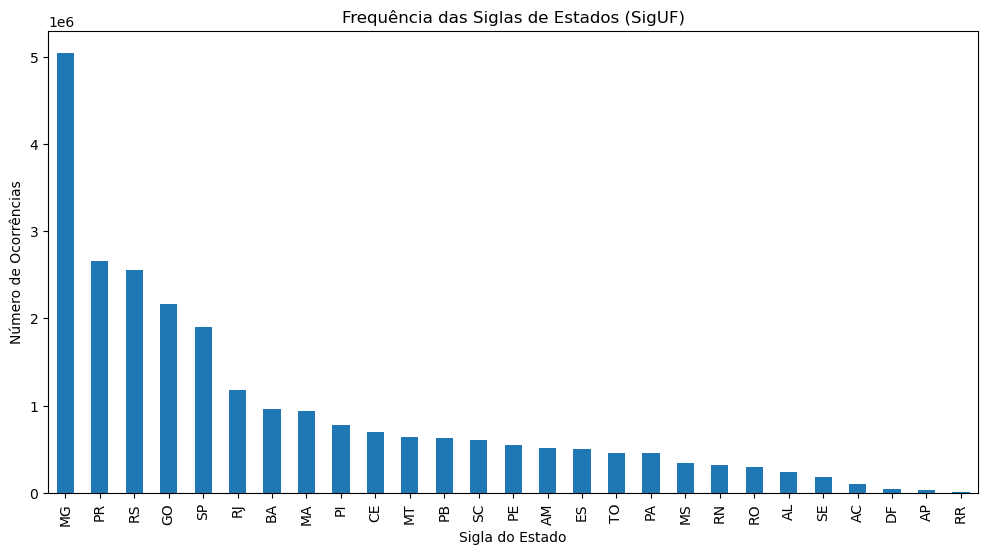

(array(['SP', 'SC', 'PR', 'RS', 'AM', 'AC', 'RO', 'DF', 'PI', 'RR', 'SE',
        'BA', 'MG', 'MS', 'RJ', 'AL', 'CE', 'TO', 'PB', 'GO', 'RN', 'PE',
        'PA', 'AP', 'MA', 'MT', 'ES'], dtype=object),
 SigUF
 MG    5043687
 PR    2661963
 RS    2551465
 GO    2161166
 SP    1898820
 Name: count, dtype: int64)

In [46]:
# 1. Visualizar as siglas únicas presentes na coluna SigUF
unique_siguf = merged_df['SigUF'].unique()

# 2. Contar a frequência de cada sigla de estado
siguf_counts = merged_df['SigUF'].value_counts()

# 3. Visualizar um gráfico de barras das frequências por estado
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
siguf_counts.plot(kind='bar')
plt.title('Frequência das Siglas de Estados (SigUF)')
plt.xlabel('Sigla do Estado')
plt.ylabel('Número de Ocorrências')
plt.show()

# Exibir as siglas únicas e as contagens
unique_siguf, siguf_counts.head()

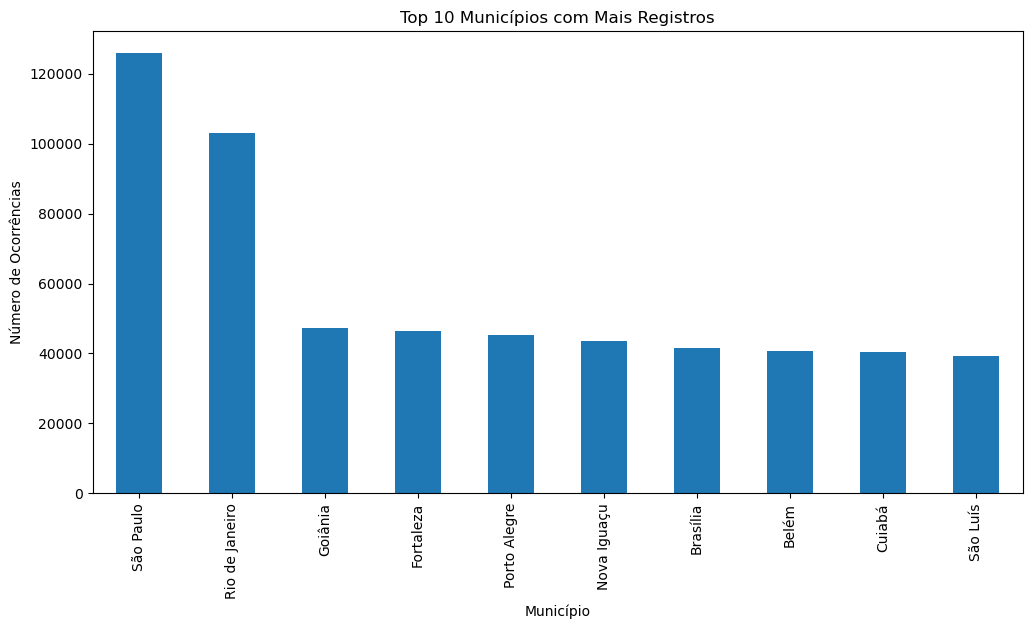

(array(['Pedreira', 'Siderópolis', 'Jaguariúna', 'Coronel Vivida',
        'Urussanga'], dtype=object),
 NomMunicipio
 São Paulo         125884
 Rio de Janeiro    102924
 Goiânia            47162
 Fortaleza          46449
 Porto Alegre       45155
 Name: count, dtype: int64)

In [47]:
# 1. Visualizar os nomes únicos presentes na coluna NomMunicipio
unique_municipios = merged_df['NomMunicipio'].unique()

# 2. Contar a frequência de cada município
municipio_counts = merged_df['NomMunicipio'].value_counts()

# 3. Visualizar um gráfico de barras das frequências por município (top 10 para melhor visualização)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
municipio_counts.head(10).plot(kind='bar')
plt.title('Top 10 Municípios com Mais Registros')
plt.xlabel('Município')
plt.ylabel('Número de Ocorrências')
plt.show()

# Exibir os nomes únicos e as contagens dos municípios
unique_municipios[:5], municipio_counts.head()

In [48]:
# Gerar um sumário quantitativo de registros para cada estado (SigUF)
state_summary = merged_df['SigUF'].value_counts()

# Exibir o sumário
state_summary

SigUF
MG    5043687
PR    2661963
RS    2551465
GO    2161166
SP    1898820
RJ    1177297
BA     961402
MA     937691
PI     784105
CE     704337
MT     646385
PB     631842
SC     612481
PE     548949
AM     516838
ES     503095
TO     463110
PA     454536
MS     348093
RN     323358
RO     295022
AL     238777
SE     181958
AC     100146
DF      41532
AP      33376
RR      12924
Name: count, dtype: int64

In [49]:
# Exibindo uma amostra dos dados para entendimento geral
merged_df.head()

,DatGeracaoConjuntoDados_x,IdeConjUnidConsumidoras,CodMunicipio,NomMunicipio,SigUF,DatGeracaoConjuntoDados_y,IdeConjuntoUnidadeConsumidora,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,...,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ,Regiao
0,2024-08-05,964,3537107,Pedreira,SP,2024-07-10,964.0,PEDREIRA,PDA21,PDA,...,2024-05-31 10:11:41,Interna;Nao Programada;Proprias do Sistema;Fal...,220.0,1.0,20087.0,2024.0,COMPANHIA JAGUARI DE ENERGIA,CPFL Jaguari,53859112000169,SE
1,2024-08-05,964,3537107,Pedreira,SP,2024-07-10,964.0,PEDREIRA,PDA23,PDA,...,2024-01-27 15:20:30,Interna;Nao Programada;Proprias do Sistema;Sob...,220.0,1.0,20055.0,2024.0,COMPANHIA JAGUARI DE ENERGIA,CPFL Jaguari,53859112000169,SE
2,2024-08-05,964,3537107,Pedreira,SP,2024-07-10,964.0,PEDREIRA,PDA25,PDA,...,2024-05-30 22:03:14,Interna;Nao Programada;Meio Ambiente;Corrosao,220.0,40.0,20087.0,2024.0,COMPANHIA JAGUARI DE ENERGIA,CPFL Jaguari,53859112000169,SE
3,2024-08-05,964,3537107,Pedreira,SP,2024-07-10,964.0,PEDREIRA,PDA23,PDA,...,2024-01-27 17:13:07,Interna;Nao Programada;Meio Ambiente;Corrosao,220.0,1.0,20055.0,2024.0,COMPANHIA JAGUARI DE ENERGIA,CPFL Jaguari,53859112000169,SE
4,2024-08-05,964,3537107,Pedreira,SP,2024-07-10,964.0,PEDREIRA,PDA23,PDA,...,2024-01-27 18:51:50,Interna;Nao Programada;Meio Ambiente;Corrosao,220.0,1.0,20055.0,2024.0,COMPANHIA JAGUARI DE ENERGIA,CPFL Jaguari,53859112000169,SE


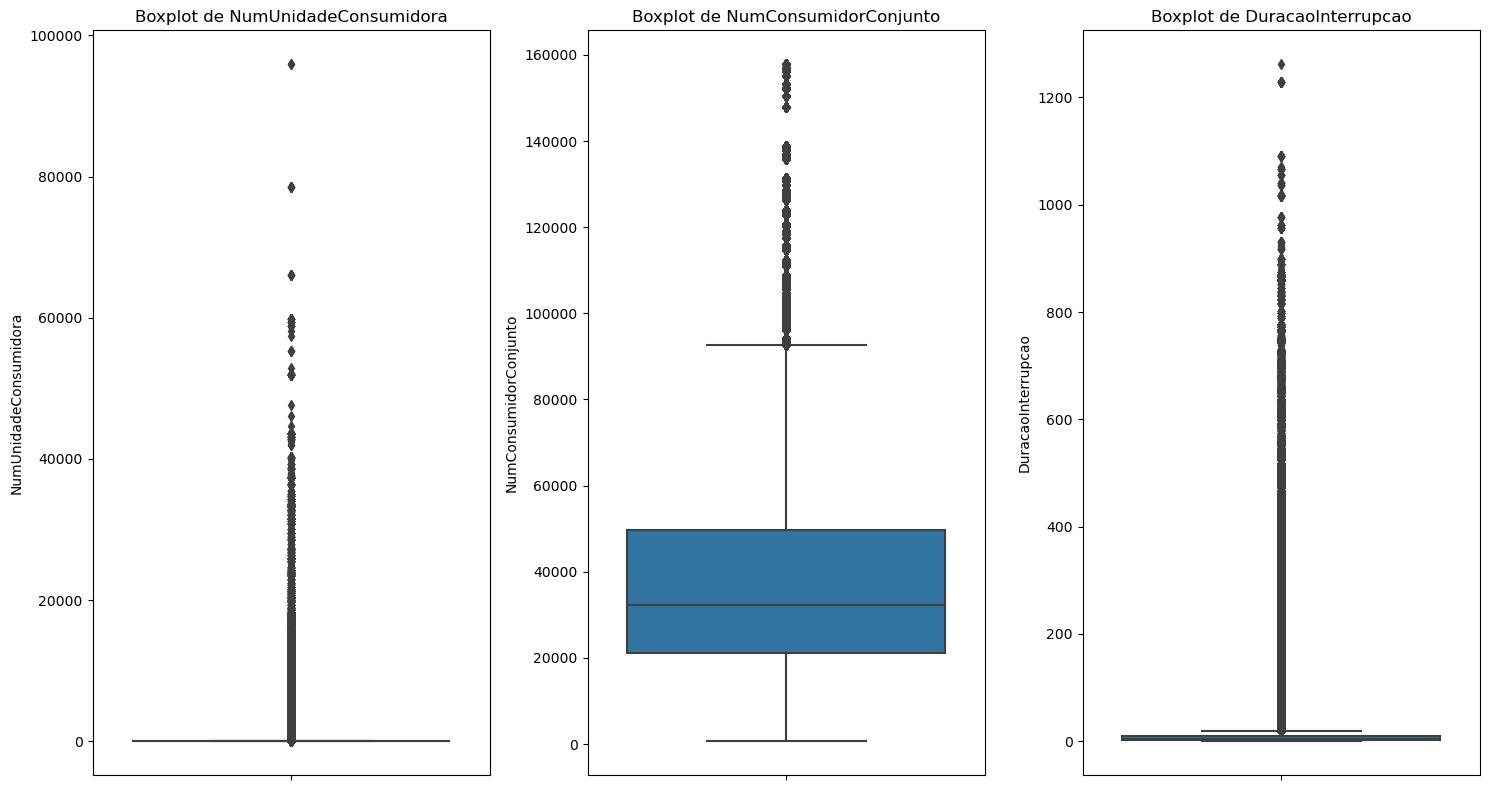

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cálculo da duração das interrupções
merged_df['DuracaoInterrupcao'] = (pd.to_datetime(merged_df['DatFimInterrupcao']) - pd.to_datetime(merged_df['DatInicioInterrupcao'])).dt.total_seconds() / 3600

# 2. Variáveis selecionadas para análise
variables = ['NumUnidadeConsumidora', 'NumConsumidorConjunto', 'DuracaoInterrupcao']

# 3. Plotar boxplots para identificar outliers
plt.figure(figsize=(15, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=merged_df[var])
    plt.title(f'Boxplot de {var}')
plt.tight_layout()
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

# 1. Selecionar as variáveis para normalização
variables_to_normalize = ['NumUnidadeConsumidora', 'NumConsumidorConjunto', 'DuracaoInterrupcao']

# 2. Inicializar o normalizador
scaler = StandardScaler()

# 3. Aplicar a normalização
normalized_data = scaler.fit_transform(merged_df[variables_to_normalize])

# 4. Substituir os dados normalizados no DataFrame original
normalized_df = pd.DataFrame(normalized_data, columns=variables_to_normalize)

# Atualizar o DataFrame original com os dados normalizados
for col in variables_to_normalize:
    merged_df[col] = normalized_df[col]

# Verificar a normalização
merged_df[variables_to_normalize].describe()

,NumUnidadeConsumidora,NumConsumidorConjunto,DuracaoInterrupcao
count,2.480723e+07,2.480723e+07,2.480723e+07
mean,8.099649e-05,-2.468527e-04,7.521169e-05
std,1.000157e+00,9.998730e-01,1.000268e+00
min,-2.051968e-01,-1.588597e+00,-4.644425e-01
25%,-2.032672e-01,-7.144218e-01,-3.685051e-01
50%,-2.013375e-01,-2.347404e-01,-2.577568e-01
75%,-1.492371e-01,5.068690e-01,2.313540e-02
max,1.849037e+02,5.127071e+00,6.847296e+01


In [52]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Aplicar o MiniBatchKMeans para diferentes valores de K para o Método do Cotovelo
inertia = []
K = range(1, 11)  # Testando de 1 a 10 clusters

for k in K:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000, n_init=10)
    minibatch_kmeans.fit(merged_df_clean[['NumUnidadeConsumidora', 'NumConsumidorConjunto', 'DuracaoInterrupcao']])
    inertia.append(minibatch_kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo com MiniBatchKMeans')
plt.show()

NameError: name 'merged_df_clean' is not defined

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Aplicar MiniBatchKMeans ao dataset completo com K=4
minibatch_kmeans_final = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=10000, n_init=10)

# Usar .loc para evitar o aviso SettingWithCopyWarning
merged_df_clean.loc[:, 'Cluster_MiniBatchKMeans'] = minibatch_kmeans_final.fit_predict(
    merged_df_clean[['NumUnidadeConsumidora', 'NumConsumidorConjunto', 'DuracaoInterrupcao']]
)

# Verificar a distribuição dos clusters
cluster_counts = merged_df_clean['Cluster_MiniBatchKMeans'].value_counts()
print(cluster_counts)

# Adicionar os centróides ao DataFrame para inspeção
centroids = minibatch_kmeans_final.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['NumUnidadeConsumidora', 'NumConsumidorConjunto', 'DuracaoInterrupcao'])
print(centroids_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Barras para a Distribuição dos Clusters
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Distribuição dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Registros')
plt.show()

# Scatter Plots para Visualizar os Centrôides
plt.figure(figsize=(14, 6))

# NumUnidadeConsumidora vs NumConsumidorConjunto
plt.subplot(1, 2, 1)
sns.scatterplot(x=centroids_df['NumUnidadeConsumidora'], y=centroids_df['NumConsumidorConjunto'], 
                hue=centroids_df.index, palette='viridis', s=100, legend=False)
plt.title('Centróides: NumUnidadeConsumidora vs NumConsumidorConjunto')
plt.xlabel('NumUnidadeConsumidora')
plt.ylabel('NumConsumidorConjunto')

# NumUnidadeConsumidora vs DuracaoInterrupcao
plt.subplot(1, 2, 2)
sns.scatterplot(x=centroids_df['NumUnidadeConsumidora'], y=centroids_df['DuracaoInterrupcao'], 
                hue=centroids_df.index, palette='viridis', s=100, legend=False)
plt.title('Centróides: NumUnidadeConsumidora vs DuracaoInterrupcao')
plt.xlabel('NumUnidadeConsumidora')
plt.ylabel('DuracaoInterrupcao')

plt.show()

In [ ]:
# Filtrar os dados do Maranhão
df_ma = merged_df_clean[merged_df_clean['SigUF'] == 'MA']

# Filtrar os dados dos outros estados
df_outros_estados = merged_df_clean[merged_df_clean['SigUF'] != 'MA']